# Finance & Economics - Analysis

**Descrição**: A base fornece, sucintamente, dados macroeconômicos e financeiros diários, incluindo  
preços do mercado de ações, crescimento do PIB, inflação, taxa de juros, gastos do consumidor,  
exchange rates, etc.

### Sequência de etapas

1. Limpeza de valores ausentes
2. Análise exploratória (EDA)
3. Divisão de treino e teste
4. Treinamento de modelos supervisionados (Linear Regression, DecisionTreeRegressor, RandomForestRegressor)
5. Validação Cruzada com GridSearchCV e ajuste de hiperparâmetros
6. Avaliação dom estimativas (métricas) de performance dos modelos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters, scatter_matrix
register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
#from yellowbrick.regressor import ResidualsPlot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_absolute_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
parse_date = lambda date: datetime.strptime(date, '%Y-%m-%d')
df = pd.read_csv('./csv files/finance_economics_dataset.csv', 
                 encoding='utf-8', 
                 na_values=False, 
                 verbose=0,
                 parse_dates=['Date'], 
                 index_col='Date', 
                 date_parser=parse_date
                )

#df = df.set_index(df.apply(lambda x: x['Date'])).dropna()
df.iloc[0:3]

,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,6.06,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3.0,76.64,4589
2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,2.19,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21.0,5.67,10101
2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,0.82,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48.0,39.43,13665


In [4]:
attr_names = [cname for cname in df.select_dtypes(exclude=['object']).columns.to_numpy().ravel()]
df.describe()

,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
count,3000.000000,3000.000000,3000.000000,3000.00000,3.000000e+03,2999.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2953.000000,3000.000000,3000.000000
mean,2982.094607,2981.249173,3018.887777,2944.32975,5.033864e+08,2.609773,5.096830,8.663787,5.218237,85.036000,...,1.146113,115.115233,85.539953,1655.167877,300.554457,5099.546667,5.007413,24.990179,49.955197,7551.278000
std,1151.862689,1151.783841,1151.683485,1151.83490,2.859004e+08,4.287787,2.910513,3.737536,2.726115,20.224829,...,0.201128,20.111351,37.847063,492.177706,114.601328,2898.714108,2.866466,14.071160,28.722592,4203.705678
min,1000.050000,954.520000,1012.130000,917.17000,1.636024e+06,-5.000000,0.010000,2.000000,0.500000,50.000000,...,0.800000,80.010000,20.040000,800.160000,100.130000,107.000000,0.010000,1.000000,0.100000,101.000000
25%,1994.982500,1997.425000,2035.952500,1955.39750,2.545224e+08,-1.015000,2.607500,5.450000,2.890000,68.000000,...,0.980000,98.267500,52.590000,1226.737500,202.370000,2503.750000,2.570000,13.000000,25.762500,3950.750000
50%,2970.780000,2977.180000,3006.520000,2939.24500,5.033710e+08,2.730000,5.110000,8.710000,5.250000,86.000000,...,1.140000,114.795000,85.080000,1666.060000,299.885000,5123.500000,5.060000,25.000000,49.840000,7610.000000
75%,3974.690000,3982.082500,4015.217500,3934.08750,7.537963e+08,6.245000,7.600000,11.882500,7.492500,103.000000,...,1.320000,132.455000,119.150000,2080.730000,399.137500,7616.250000,7.482500,37.000000,74.825000,11148.750000
max,4998.230000,5034.130000,5076.190000,4977.06000,9.999771e+08,10.000000,10.000000,15.000000,10.000000,119.000000,...,1.500000,149.960000,149.870000,2499.660000,499.920000,9998.000000,10.000000,49.000000,99.990000,14990.000000


In [5]:
if np.sum(len(df.index)) > 0:
    pass;
else:
    df = df.set_index(df.apply(lambda x: x['Date'])).dropna(inplace=True, axis=0)

In [6]:
df = df.dropna()

In [7]:
df['Trading Volume'].describe().apply(lambda x: format(x, 'f'))

count         2952.000000
mean     503741611.729336
std      286341669.895975
min        1636024.000000
25%      255393022.000000
50%      503371035.500000
75%      754402744.250000
max      999977078.000000
Name: Trading Volume, dtype: object

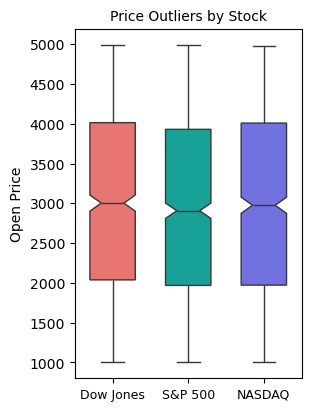

In [8]:
stock_idx = np.random.permutation(df['Stock Index'].unique().transpose())
fig, ax = plt.subplots(figsize=(3, 4), layout='constrained')
bplot = sns.boxplot(x=df['Stock Index'], y=df['Open Price'], notch=True, label='Price', 
                    patch_artist=True, ax=ax, palette=['#FD625E', '#01B8AA', '#5E5EF2'],
                   width=0.6).set_title('Price Outliers by Stock', fontsize=10)
ax.set_xlabel('')
ax.set_xticklabels(labels=np.array(['Dow Jones', 'S&P 500', 'NASDAQ']), fontsize=9)
#for patch, color, in zip(bplot['boxes'], colors):
 #   patch.set_facecolor(color)
plt.show()

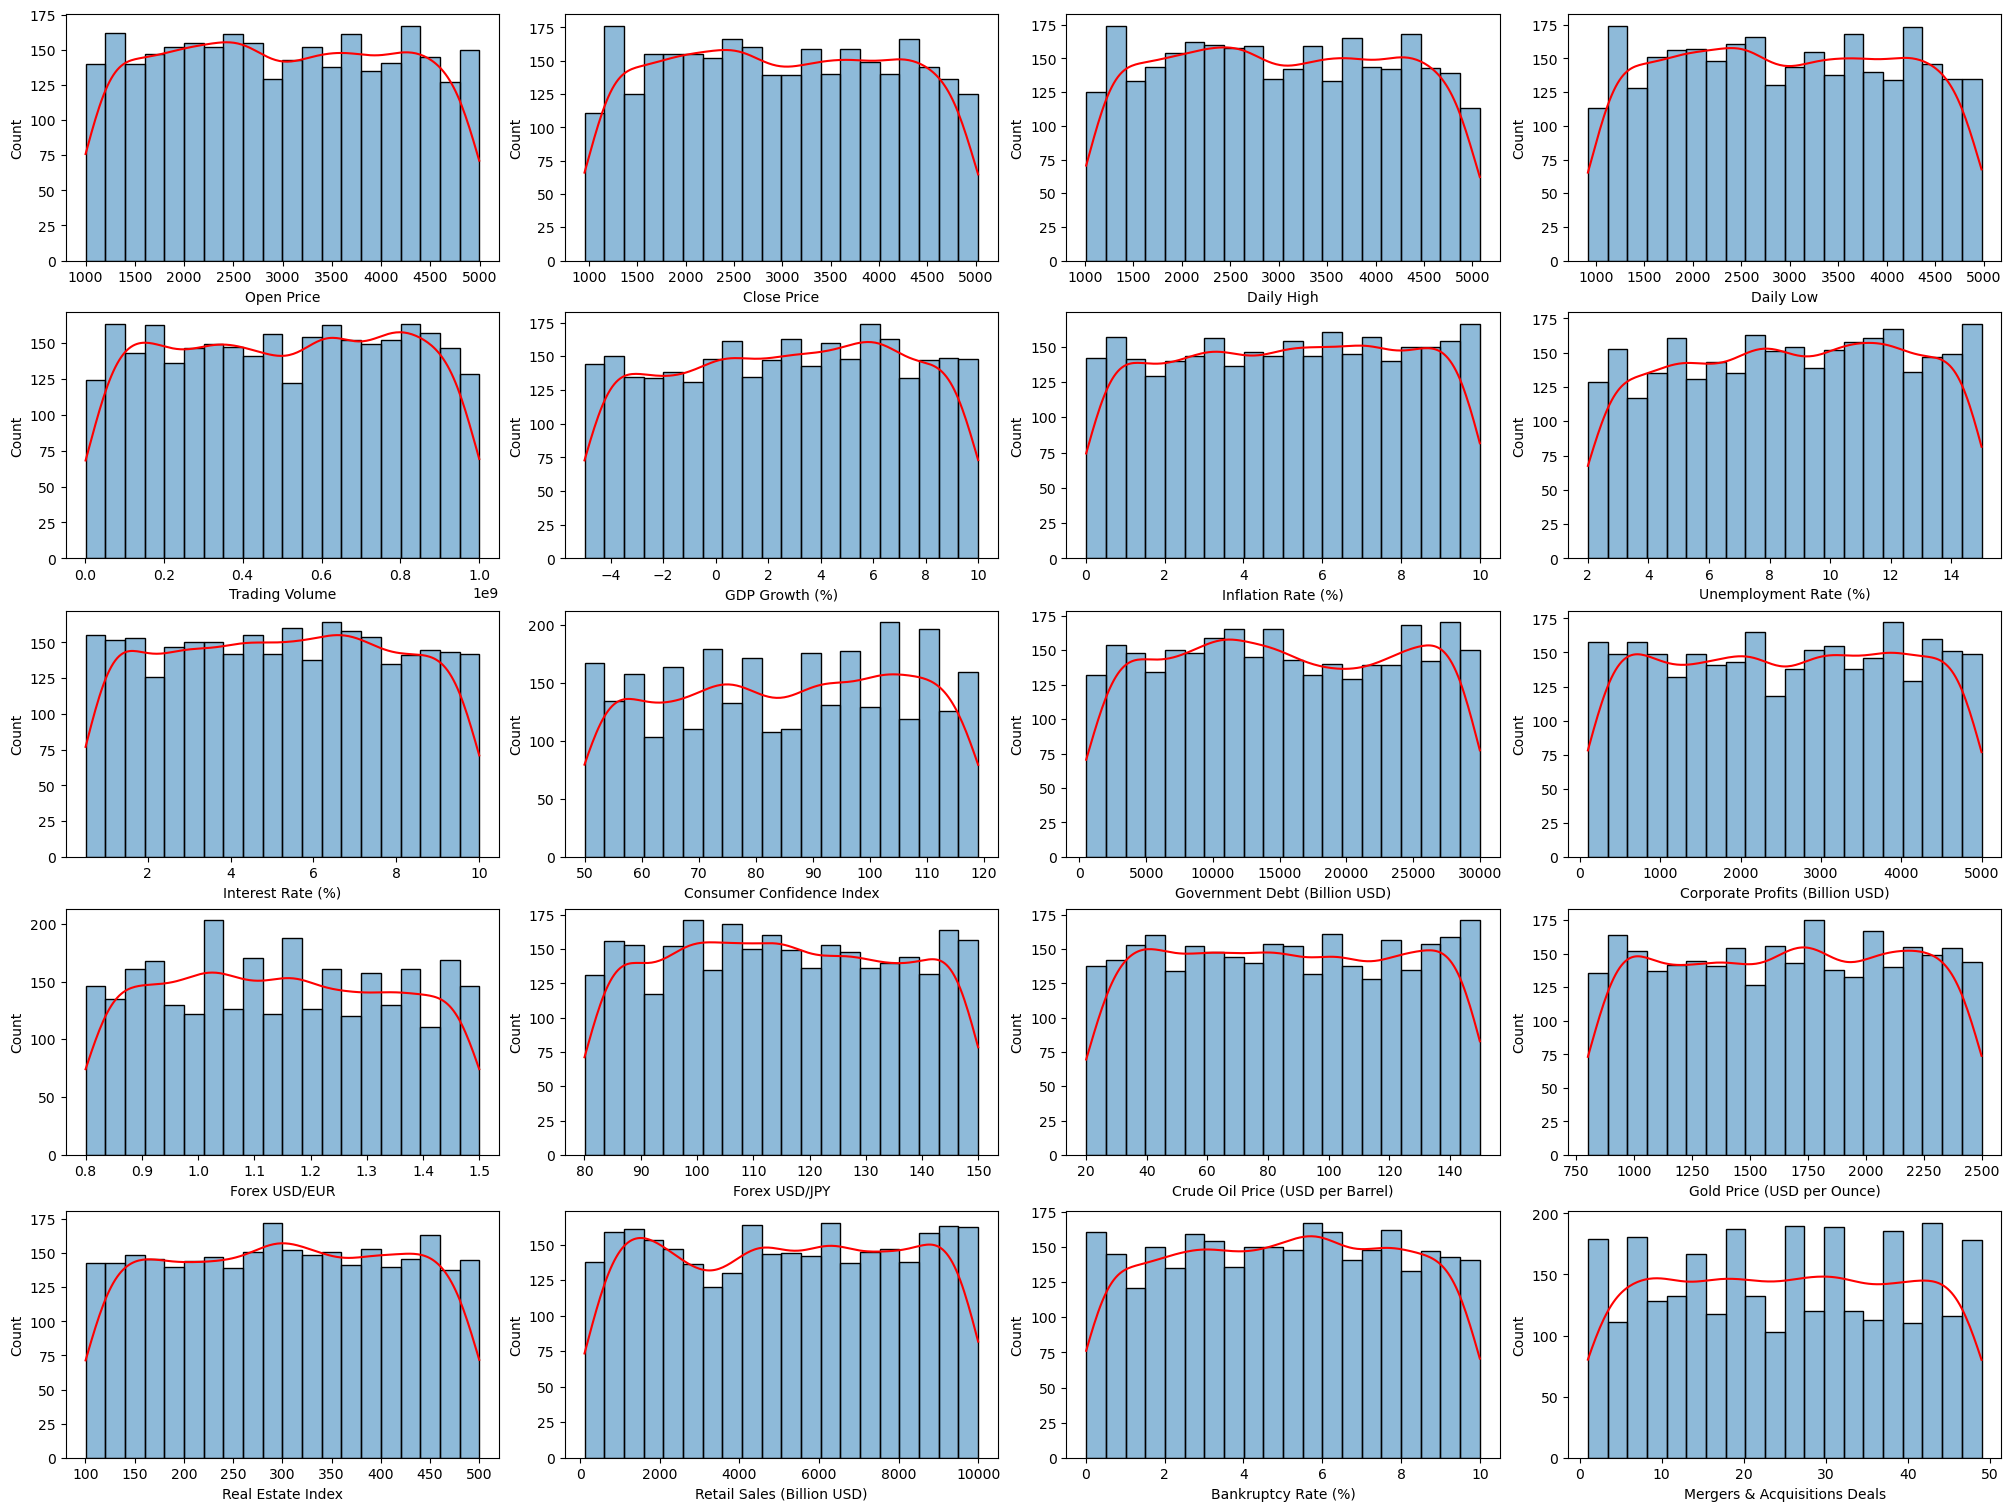

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15), layout='constrained')

for cname, ax in zip(attr_names, axes.flatten()):
    hist = sns.histplot(data=df, x=cname, ax=ax, kde=True, bins=20)
    hist.lines[0].set_color('red')

plt.show()

In [10]:
def split_train_test(file:pd.DataFrame, test_ratio=0.2):
    shuffle_index = np.random.permutation(int(len(file)))
    set_partition = int(len(df) * test_ratio)
    train_size = shuffle_index[set_partition:]
    test_size = shuffle_index[:set_partition]

    return file.iloc[train_size], file.iloc[test_size]

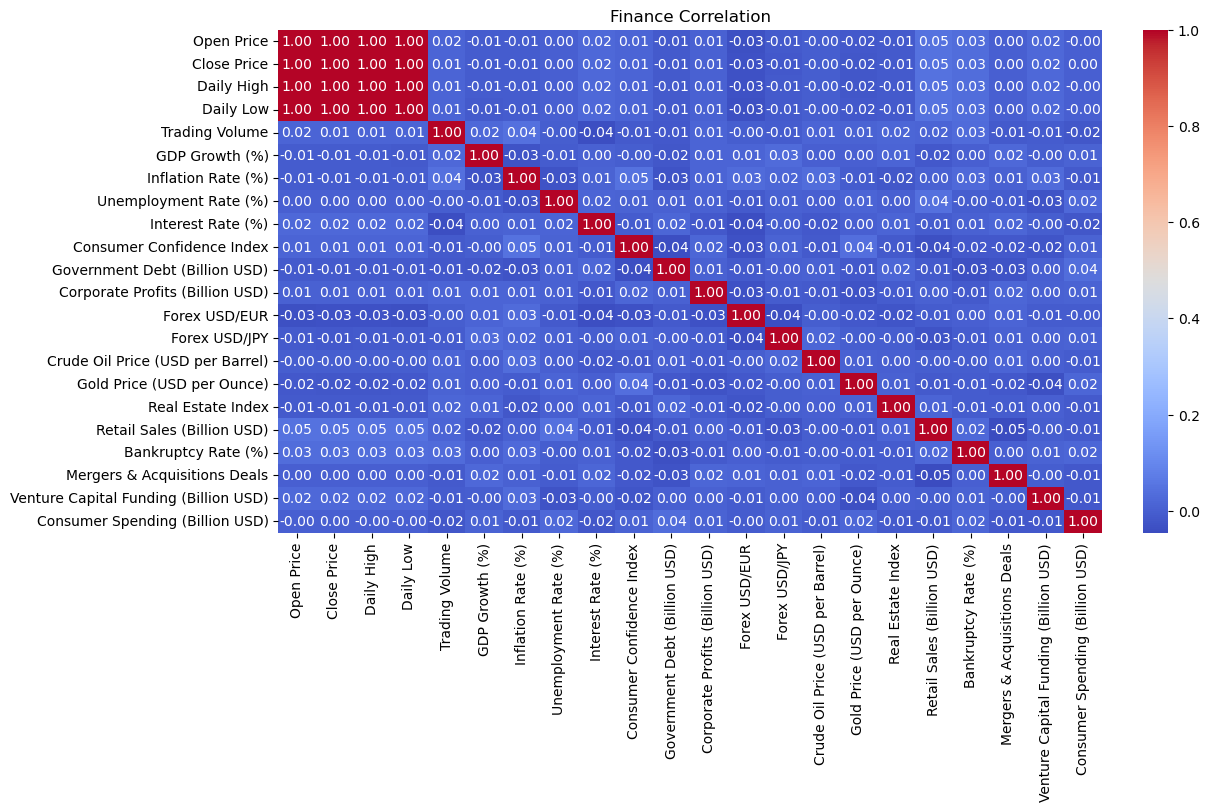

In [11]:
attr_corr = df[attr_names].corr()
fig, ax = plt.subplots(figsize=(12, 8), layout='constrained', sharex=True)
plot_heatmap = sns.heatmap(attr_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax) \
                .set_title('Finance Correlation')

plt.show()

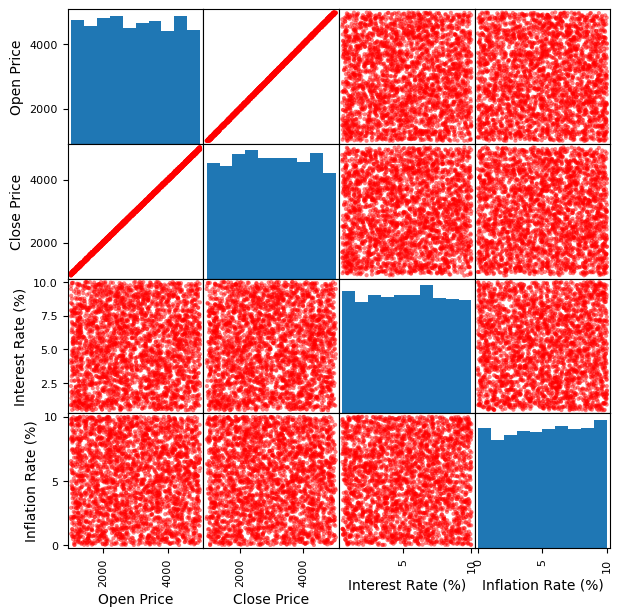

In [12]:
scatter_matrix(df[['Open Price', 'Close Price', 'Interest Rate (%)', 'Inflation Rate (%)']], figsize=(7, 7), 
               color='red')

plt.show()

In [13]:
#strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
x = df.iloc[:, [6, 9]].values
y = df.iloc[:, 7].values

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2361, 2), (2361,), (591, 2), (591,))

In [14]:
lnr = LinearRegression(fit_intercept=True).fit(x_train, y_train)
lnr

LinearRegression()

In [15]:
y_pred = lnr.predict(x_test)

In [16]:
lnr.score(x_train, y_train)

0.0016371237026077123

In [17]:
lnr.intercept_

5.000252131144101

In [18]:
lnr.coef_

array([-0.02502132,  0.0168548 ])

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
tree_reg

DecisionTreeRegressor(random_state=42)

In [20]:
y_pred_tree_reg = tree_reg.predict(x_test)
y_pred_tree_reg[:10]

array([4.45, 3.81, 9.72, 1.  , 5.6 , 6.44, 5.58, 7.75, 3.58, 5.41])

In [21]:
def display_score(score):
    print(f'Score: {score}')
    print(f'Mean: {score.mean()}')
    print(f'Deviation: {score.std()}')

In [22]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_tree_reg)}')

RMSE: 4.238417979769715


In [23]:
score = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_tree_scores = np.sqrt(-score)
rmse_tree_scores

array([4.18780488, 4.10296327, 4.16659669, 3.99264546, 4.09278235,
       3.97967234, 3.86330537, 3.89032688, 4.03343962, 3.95831275])

In [24]:
display_score(rmse_tree_scores)

Score: [4.18780488 4.10296327 4.16659669 3.99264546 4.09278235 3.97967234
 3.86330537 3.89032688 4.03343962 3.95831275]
Mean: 4.0267849617989375
Deviation: 0.10444986403750896


In [25]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=1).fit(x_train, y_train)
forest_reg

RandomForestRegressor(n_estimators=1)

In [26]:
y_pred_forest_reg = forest_reg.predict(x_test)
y_pred_forest_reg[:10]

array([5.96, 8.73, 0.84, 9.96, 5.91, 6.44, 8.22, 8.11, 5.1 , 9.38])

In [27]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_forest_reg)}')

RMSE: 4.105568584376009


In [28]:
forest_score = cross_val_score(forest_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_forest_reg = np.sqrt(-forest_score)

In [29]:
display_score(rmse_forest_reg)

Score: [4.16229651 4.28321646 3.75278874 4.17603245 4.26342859 3.96295024
 3.97300616 3.93739208 4.04253314 4.16876394]
Mean: 4.072240829215721
Deviation: 0.15879900403840813


In [30]:
params_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'DecisionTree Regressor': {
        'criterion': ['absolute_error', 'squared_error'],
    }
}

#seed = np.random.seed(42)
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [31]:
models = {
    'Linear Regression': LinearRegression(fit_intercept=True),
    'DecisionTree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

best_models = {}
for name, model in models.items():
    if name in params_grid:
        try:
            grid = GridSearchCV(model, params_grid[name], scoring='neg_mean_squared_error', cv=5,
                           n_jobs=-1, verbose=False)
            grid.fit(x_train, y_train)
            best_models[name] = grid.best_estimator_
            print(f'{name} best param: {grid.best_params_}')
        except Exception as e:
            print(f"Erro ao treinar {name}: {e}")
    else:
        model.fit(x_train, y_train)
        best_models[name] = model

DecisionTree Regressor best param: {'criterion': 'squared_error'}
Random Forest best param: {'max_depth': 10, 'n_estimators': 100}


In [32]:
cvres = grid.cv_results_
for mean_score, std_score, params in zip(cvres['mean_test_score'], cvres['std_test_score'], cvres['params']):
    print(f'mean_score: {np.sqrt(-mean_score)}, std_score: {std_score}, params: {params}')

mean_score: 3.106453348503055, std_score: 0.42278563387061574, params: {'max_depth': None, 'n_estimators': 100}
mean_score: 3.1043352922330185, std_score: 0.44443342640698447, params: {'max_depth': None, 'n_estimators': 200}
mean_score: 2.9266447446480255, std_score: 0.3924118234969594, params: {'max_depth': 10, 'n_estimators': 100}
mean_score: 2.926874113372777, std_score: 0.4051123602364956, params: {'max_depth': 10, 'n_estimators': 200}
mean_score: 3.029442550571254, std_score: 0.45905572158740315, params: {'max_depth': 20, 'n_estimators': 100}
mean_score: 3.0281330977514576, std_score: 0.476833207170005, params: {'max_depth': 20, 'n_estimators': 200}


- A margem de erro, em média, é consideravelmente menor, porém não há explicação entre as variáveis.
- Os modelos de regressão não demonstram desempenho plausível, podendo induzir a inferências enganosas.